In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### A. Four Clusters

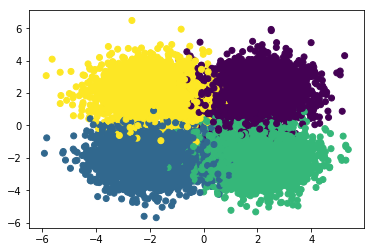

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of the blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### 1. KMeans

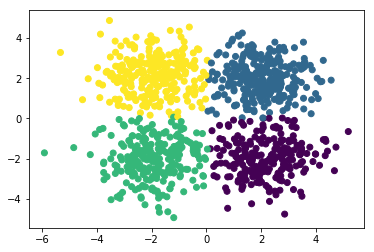

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [3]:
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

#### 2. MeanShift

Number of estimated clusters: 4


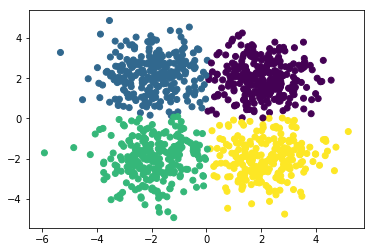

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#### 3. Spectral

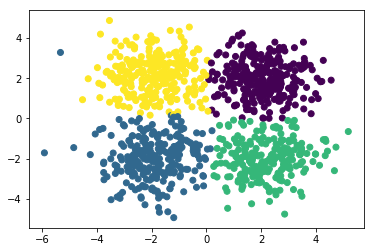

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      262    0    3    8
1        0  228    6    5
2        3   11  223    1
3        2   10    0  238


In [5]:
from sklearn.cluster import SpectralClustering

n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#### 4. Affinity Propagation

Done
Estimated number of clusters: 25


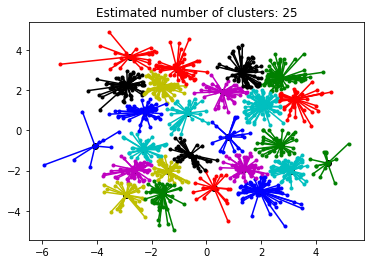

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### B. Two Clusters

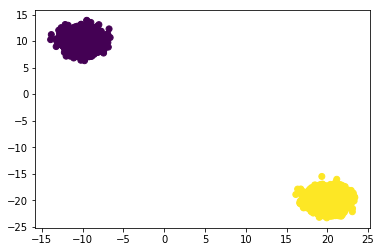

In [7]:
centers = [[-10, 10], [20, -20]]

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### 1. KMeans

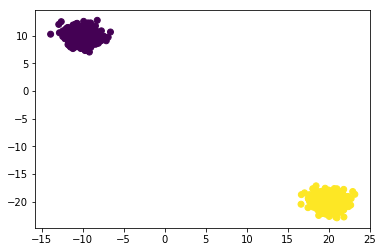

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    0
1        0  488


In [8]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

#### 2. MeanShift

Number of estimated clusters: 2


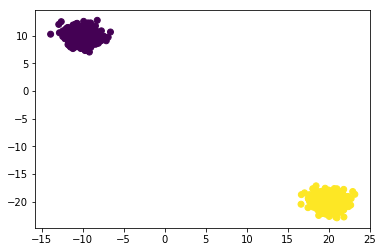

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


In [9]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#### 3. Spectral

C:\Users\James\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


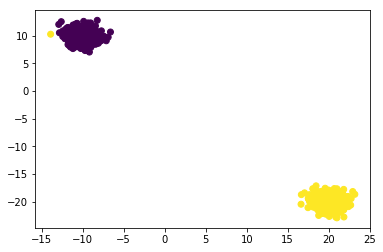

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        0  488


In [10]:
n_clusters=2

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#### 4. Affinity Propagation

Done
Estimated number of clusters: 225


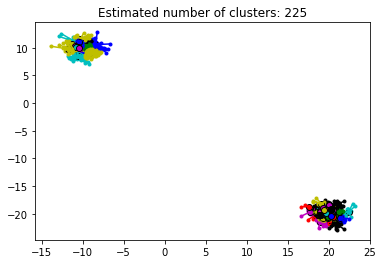

In [11]:
af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### C. Twelve Clusters

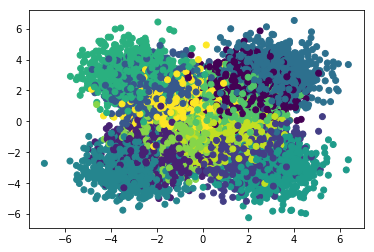

In [12]:
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [3, 3], [-3, -3], [3, -3], [-3, 3], [1, 1], [-1, -1], [1, -1], [-1, 1]]

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### 1. KMeans

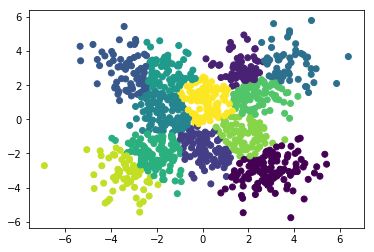

Comparing k-means clusters against the data:
col_0  0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                
0       0   0  42   0   0   0  76   0   0   0   3   0
1      33   0   0   0  19   0   0   0   7   0   0   1
2       0   7  16   0   0   1   6   0   1  26  28   4
3       0   0   0  21   0   0   0  51   0   1   0   0
4       9   0   0   0  43   0   0   0   2   0   0   0
5       0   3   1  27   0   1   0   5   2  35   2  30
6       1   0   0  32   0   0   0  26   1   0   0  11
7       0  63   0   0   0  24   0   0   0  23   2   0
8      42   0   0   0  14   0   0   0  24   0   2   0
9       2   0  37   0   0   0   5   0   6   1  29   1
10      0  12   0   0   0  49   0   0   0   0   0   0
11      4   0   1   9   0   0   0   0  25  11  10  30


In [13]:
y_pred = KMeans(n_clusters=12, random_state=42).fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

#### 2. MeanShift

Number of estimated clusters: 1


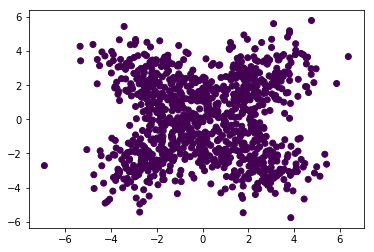

Comparing the assigned categories to the ones in the data:
col_0   0
row_0    
0      91
1      85
2      97
3      89
4      76
5      75
6      87
7      82
8      68
9      97
10     76
11     77


In [14]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#### 3. Spectral

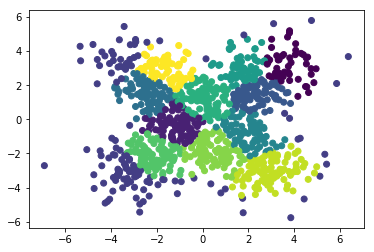

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                
0       9   0   0  40   0   4  33   4   0   0   0   1
1       0   7  16   0   0   0   0   0  56   6   0   0
2       0   1   4   0   0  35   0   1   0  23  33   0
3       0   8   2   0  39   0   0  12   0   0   0  28
4      38   0   8  11   0   0  19   0   0   0   0   0
5       0   1  52   0   0   0   0   0  21   1   0   0
6       0   0   9   0   0   6   0   0   0   8  64   0
7       0   0  33   0  24   0   0   1   0   0   0  24
8       2   0   0  23   1   8   7  25   0   1   0   1
9       0  51   1   0   3   1   0   8  19  14   0   0
10      0   6   0   2   1  26   0   9   1  28   3   0
11      0  16   0   0  18   1   1  30   0   3   0   8


In [15]:
n_clusters=12

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#### 4. Affinity Propagation

Done
Estimated number of clusters: 31


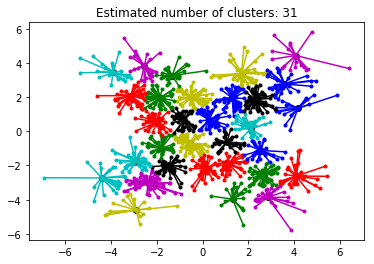

In [16]:
af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()